In [1]:
import random
import matplotlib.pyplot as plt
from functools import reduce
import itertools as it
from collections import Counter
import numpy as np
import numpy.random as npr
from tqdm.notebook import tqdm, trange
import time    # to be used in loop iterations


In [2]:
agent_num = 100
gen_num = pow(10,4)
pair_num = 500

max_strat = 6
min_strat = -5

max_score = 5
min_score = -5

cost = 1
benefit_score = 1
benefit = 10

sim_number = pow(10,2)
graphs_to_display = [0,10,20,150]

In [3]:
class Agent:
    def __init__(self, strategy, strategy_h, score, payoff):
        self.payoff = payoff
        self.strategy_h = strategy_h
        self.strategy = strategy
        self.score = score
        
    def add_score(self, new_score):
        temp_score = new_score + self.score
        if temp_score >= min_score and temp_score <= max_score:
             self.score = temp_score
        elif temp_score < min_score:
            self.score = min_score
        elif temp_score > max_score:
            self.score = max_score

                    
def selectOne(population):
    max_value = sum([c.payoff for c in population])
    selection_probs = [c.payoff/max_value for c in population]
    return population[npr.choice(len(population), p=selection_probs)]

  0%|          | 0/100 [00:00<?, ?it/s]

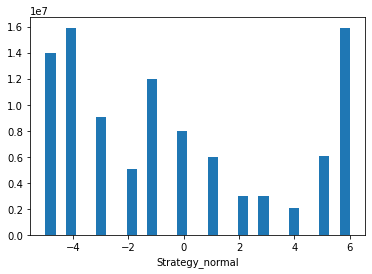

Counter({4: 19879395, 3: 14004692, 6: 11987495, 2: 11076043, 5: 9981615, -2: 6008636, 1: 5998121, -1: 5964647, -4: 4992948, -5: 4032852, 0: 4028854, -3: 2044702})


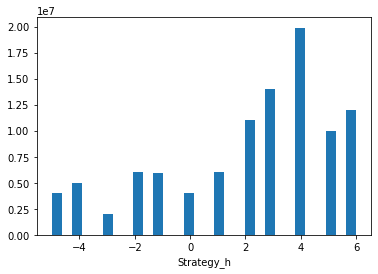

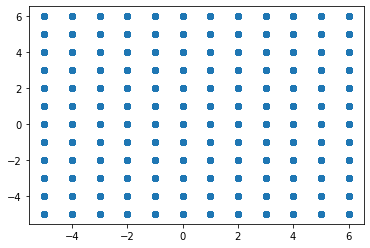

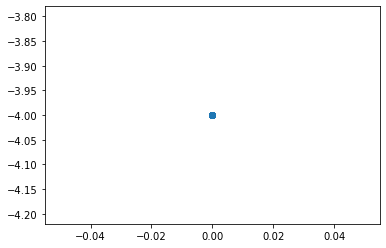

In [4]:
def get_random_normal_strategy():
    return random.randint(min_strat, max_strat)




strategies_to_print = {}
strategies = []

for sim in trange(sim_number) :
    #print("Simulation ", sim)
    
    agents = []
    
    for i in range(agent_num):
        agents.append(Agent(get_random_normal_strategy(),get_random_normal_strategy(), 0,0))
    
    ###### GENERATION ######
        
        
    for gen in range(gen_num) :
        
                
        ###### PAIRS ######
        
        for agent in agents:
            strategies.append((agent.strategy,agent.strategy_h))
        
        for pair in range(pair_num) :
            donor,recipient = random.sample(agents, 2)
            

            if recipient.score >= donor.strategy or donor.score < donor.strategy_h:
                recipient.payoff += benefit
                donor.payoff -= cost
                donor.add_score(benefit_score)
            else:
                donor.add_score(-benefit_score)
              
            
         
        ###### END PAIRS ######

        
        #### PAYOFF TRANSLATION/NORMALIZATION ####
        current_payoffs = []
        for agent in agents:
            current_payoffs.append(agent.payoff)

        min_payoff = min(current_payoffs)

        if min_payoff <= 0:
            for agent in agents:
                agent.payoff = agent.payoff + (-1)*min_payoff + 1
        elif min_payoff >1:
            for agent in agents:
                agent.payoff = agent.payoff - (min_payoff -  1)
        #### END OF PAYOFF TRANSLATION/NORMALIZATION ####

      
        new_agents = []
        agents.sort(key=lambda x: x.payoff, reverse=True)
        for agent in range(len(agents)):
            parent = selectOne(agents)
            new_agents.append(Agent(parent.strategy,parent.strategy_h, 0,0))
       
        
        agents = new_agents
        
    
        #for agent in agents:
        #    strategies.append((agent.strategy,agent.strategy_h))
    
 
    
    ###### END GENERATIONS ######
    current_strategy = []
    for agent in agents:
        current_strategy.append((agent.strategy,agent.strategy_h))
        


strat_normal = []
strat_h = []

strat_normal_last = []
strat_h_last = []

for c in strategies:
    strat_normal.append(c[0])
    strat_h.append(c[1])

for c in current_strategy:
    strat_normal_last.append(c[0])
    strat_h_last.append(c[1])

plt.hist(strat_normal, bins=30)
plt.ylabel('')
plt.xlabel("Strategy_normal")
plt.show()

print(Counter(c[1] for c in strategies))

plt.hist(strat_h, bins=30)
plt.ylabel('')
plt.xlabel("Strategy_h")
plt.show()


plt.scatter(strat_normal, strat_h, alpha=0.1)
plt.show()

plt.scatter(strat_normal_last, strat_h_last, alpha=0.1)
plt.show()

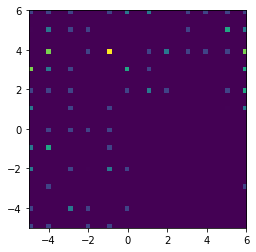

In [42]:
heatmap, xedges, yedges = np.histogram2d(strat_normal, strat_h, bins=50)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]



plt.clf()
plt.imshow(heatmap.T, extent=extent, origin='lower', cmap='Pastel1')
plt.savefig('teste.pdf')
plt.show()



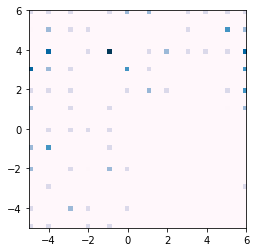

In [59]:
plt.clf()
plt.imshow(heatmap.T, extent=extent, origin='lower', cmap='PuBu')
plt.show()


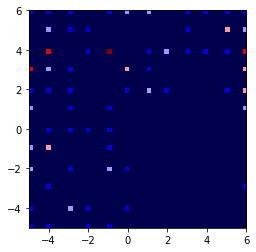

In [63]:
plt.clf()
plt.imshow(heatmap.T, extent=extent, origin='lower', cmap='seismic')
plt.show()


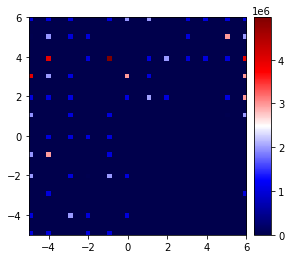

In [79]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

plt.clf()
ax = plt.subplot()
im = ax.imshow(heatmap.T, extent=extent, origin='lower', cmap='seismic')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="8%", pad=0.1)
plt.colorbar( im, cax=cax)
plt.savefig('teste.pdf')
plt.show()

In [ ]:
plt.clf()
plt.imshow(heatmap.T, extent=extent, origin='lower', cmap='PuBu')
plt.show()


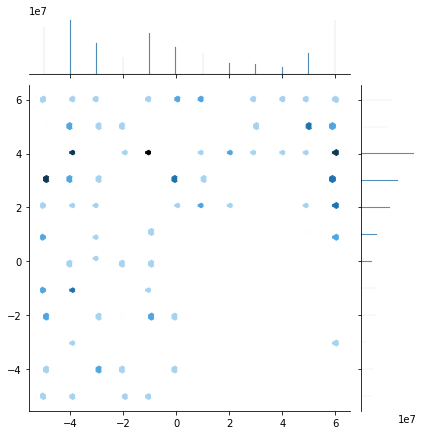

In [6]:
import seaborn as sns
sns.jointplot(x=strat_normal, y=strat_h, kind='hex')
plt.show()

In [82]:
import altair as alt
from vega_datasets import data

source = data.stocks()

print(source)

alt.Chart(source).mark_line().encode(
    x='date',
    y='price',
    color='symbol',
    strokeDash='symbol',
)

    symbol       date   price
0     MSFT 2000-01-01   39.81
1     MSFT 2000-02-01   36.35
2     MSFT 2000-03-01   43.22
3     MSFT 2000-04-01   28.37
4     MSFT 2000-05-01   25.45
..     ...        ...     ...
555   AAPL 2009-11-01  199.91
556   AAPL 2009-12-01  210.73
557   AAPL 2010-01-01  192.06
558   AAPL 2010-02-01  204.62
559   AAPL 2010-03-01  223.02

[560 rows x 3 columns]


alt.Chart(...)